# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("census2011.csv")

In [3]:
df.head()

,Ranking,District,State,Population,Growth,Sex-Ratio,Literacy
0,1,Thane,Maharashtra,"11,060,148",36.01 %,886,84.53
1,2,North Twenty Four Parganas,West Bengal,"10,009,781",12.04 %,955,84.06
2,3,Bangalore,Karnataka,"9,621,551",47.18 %,916,87.67
3,4,Pune,Maharashtra,"9,429,408",30.37 %,915,86.15
4,5,Mumbai Suburban,Maharashtra,"9,356,962",8.29 %,860,89.91


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ranking     610 non-null    int64  
 1   District    610 non-null    object 
 2   State       610 non-null    object 
 3   Population  610 non-null    object 
 4   Growth      610 non-null    object 
 5   Sex-Ratio   610 non-null    int64  
 6   Literacy    610 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 33.5+ KB


### Converting Population and growth rate to numerical data type

In [5]:
df["Population"]=df["Population"].str.replace(",","")
df["Population"]=df["Population"].astype(int)

df["Growth"]=df["Growth"].str.replace(" %","")
df["Growth"]=df["Growth"].astype(float)

In [6]:
df.describe()

,Ranking,Population,Growth,Sex-Ratio,Literacy
count,610.000000,6.100000e+02,610.000000,610.000000,610.000000
mean,329.598361,1.845019e+06,19.439852,944.914754,72.344344
std,184.656903,1.566814e+06,14.996064,61.247694,10.540881
min,1.000000,8.004000e+03,-21.570000,534.000000,36.100000
25%,183.250000,7.754178e+05,12.357500,905.000000,65.255000
50%,335.500000,1.498161e+06,17.325000,948.000000,72.150000
75%,487.750000,2.423572e+06,23.190000,982.000000,79.987500
max,640.000000,1.106015e+07,131.810000,1184.000000,97.910000


### Data visualisation before processing

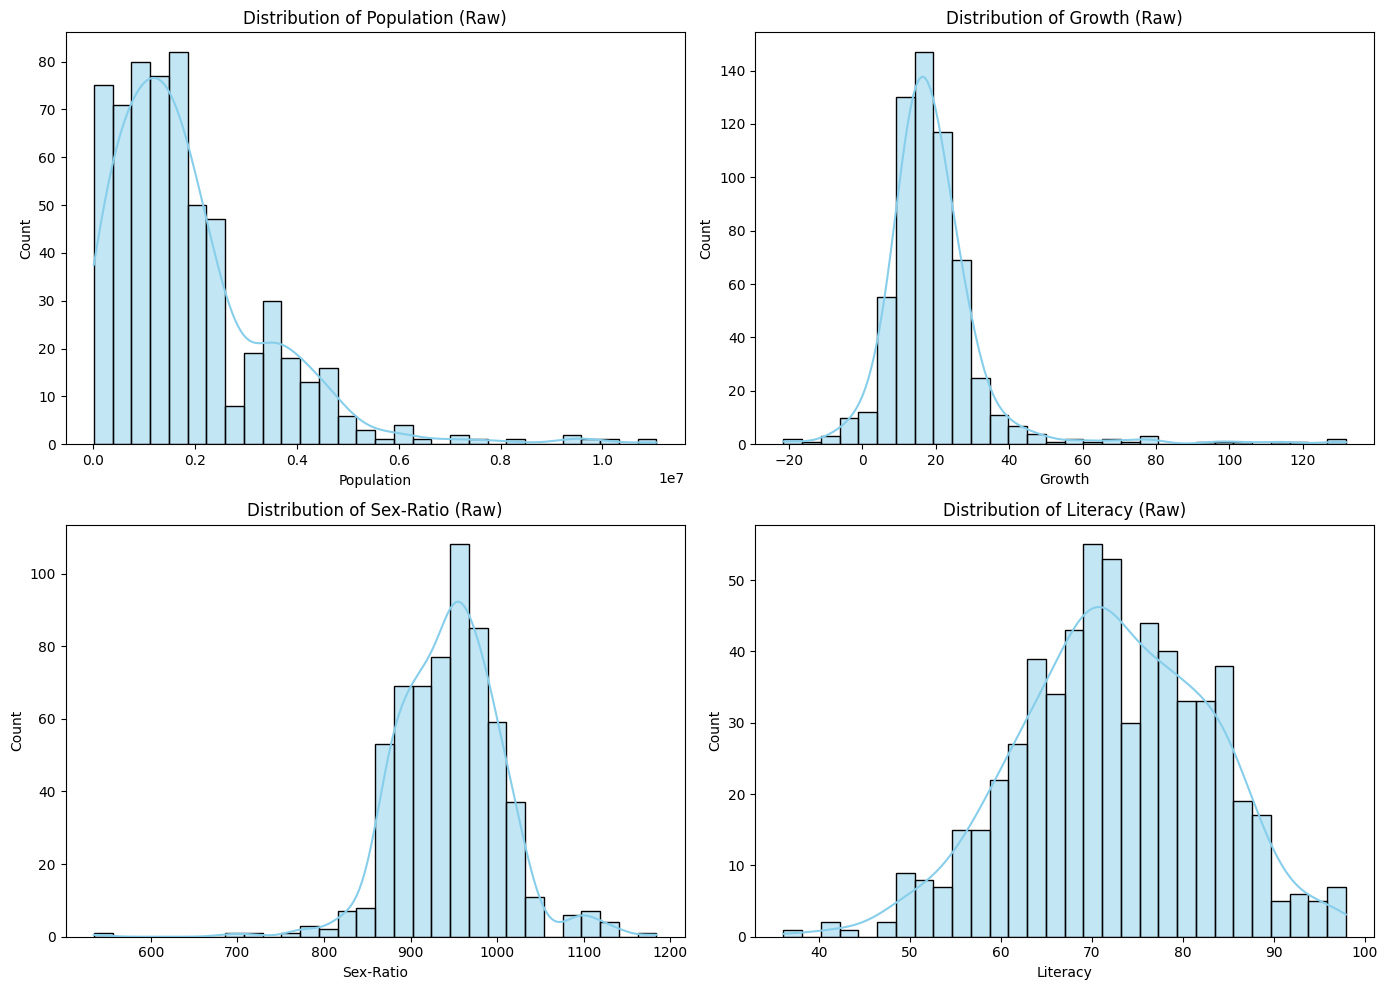

In [7]:
numeric_features = ['Population', 'Growth', 'Sex-Ratio', 'Literacy']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[feature].astype(str).str.replace(',', '').str.replace('%','').astype(float), bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {feature} (Raw)')
plt.tight_layout()
plt.show()


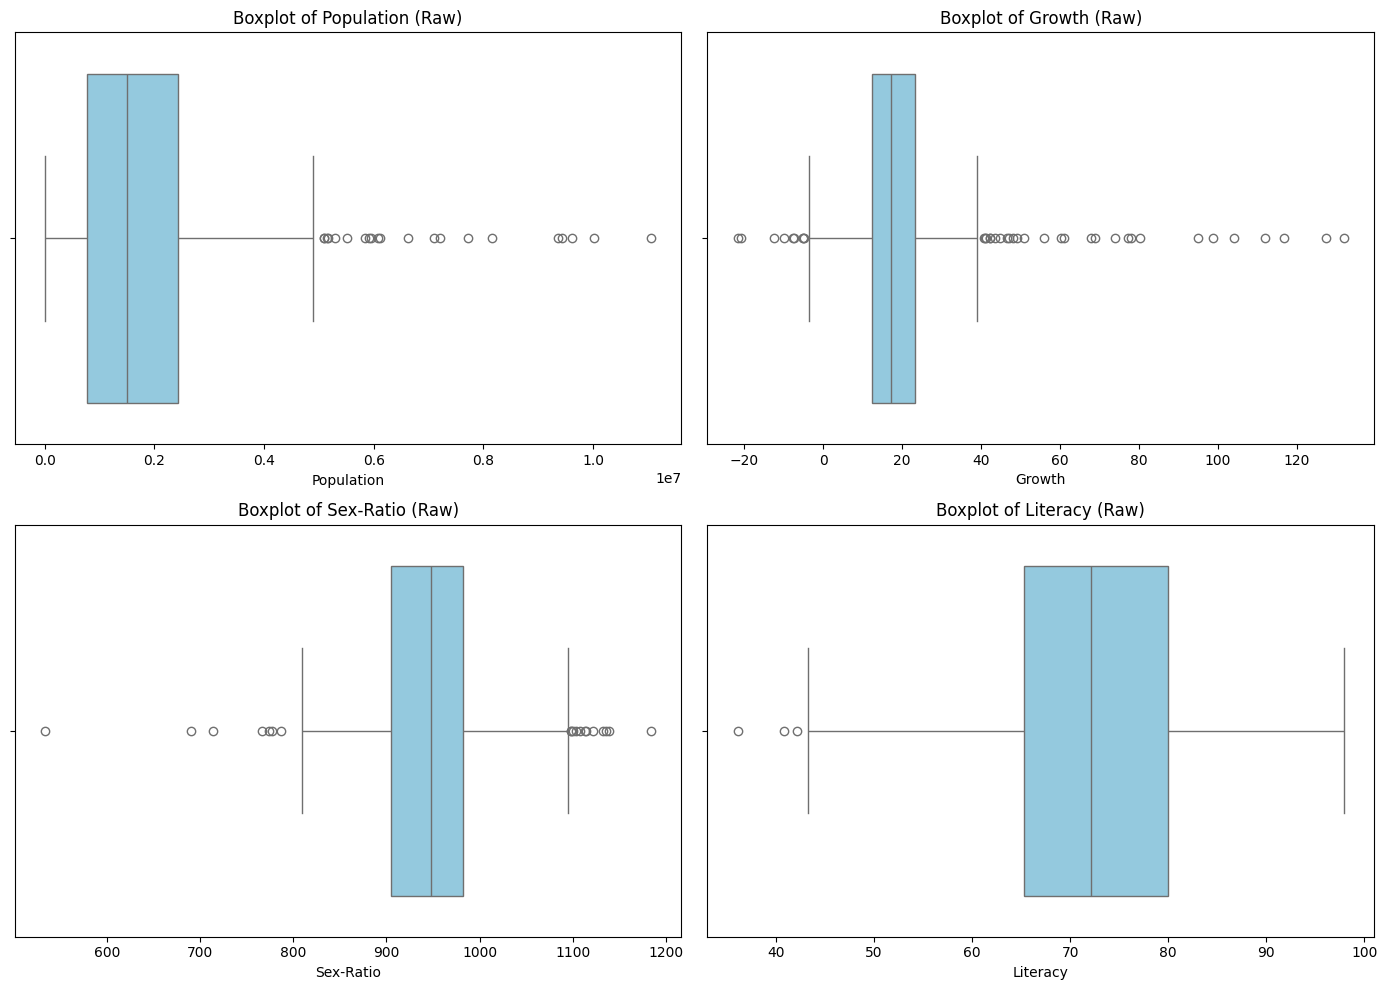

In [8]:
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[feature].astype(str).str.replace(',', '').str.replace('%','').astype(float), color='skyblue')
    plt.title(f'Boxplot of {feature} (Raw)')
plt.tight_layout()
plt.show()

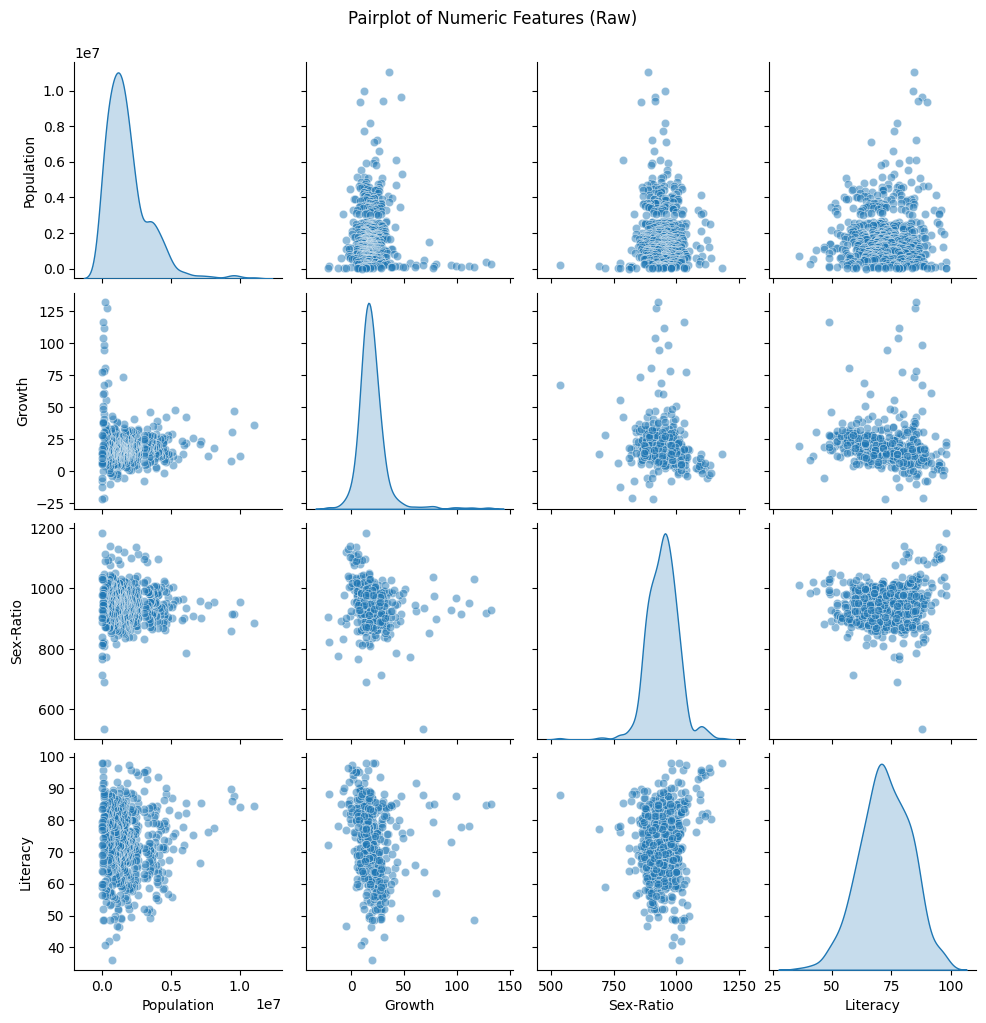

In [9]:
sns.pairplot(df[numeric_features], diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pairplot of Numeric Features (Raw)', y=1.02)
plt.show()


### Missing Values Handling

In [10]:
df.isnull()

,Ranking,District,State,Population,Growth,Sex-Ratio,Literacy
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
605,False,False,False,False,False,False,False
606,False,False,False,False,False,False,False
607,False,False,False,False,False,False,False
608,False,False,False,False,False,False,False


In [11]:
print("Missing values in data:\n", df.isnull().sum())

Missing values in data:
 Ranking       0
District      0
State         0
Population    0
Growth        0
Sex-Ratio     0
Literacy      0
dtype: int64


##### It is seen that all the columns have 0 null values still I am using writing code to fill missing data with median value of the column, here it is unnecessary as there are no missing values in the data

In [12]:
columns_to_fill = ['Population', 'Growth', 'Sex-Ratio', 'Literacy']
for col in columns_to_fill:
   df[col] = df[col].fillna(df[col].median())

In [13]:
print("Missing values in data:\n",df.isnull().sum())

Missing values in data:
 Ranking       0
District      0
State         0
Population    0
Growth        0
Sex-Ratio     0
Literacy      0
dtype: int64


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ranking     610 non-null    int64  
 1   District    610 non-null    object 
 2   State       610 non-null    object 
 3   Population  610 non-null    int64  
 4   Growth      610 non-null    float64
 5   Sex-Ratio   610 non-null    int64  
 6   Literacy    610 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 33.5+ KB


### Anomalies handling
##### I am not removies outliers as they are genuine data points and are cities which are special cases

In [15]:
df=df[df['Population']>0]
df=df[df['Sex-Ratio']>100]
df=df[(df['Literacy']>=0 ) & (df['Literacy']<=100)]

In [16]:
df.describe()

,Ranking,Population,Growth,Sex-Ratio,Literacy
count,610.000000,6.100000e+02,610.000000,610.000000,610.000000
mean,329.598361,1.845019e+06,19.439852,944.914754,72.344344
std,184.656903,1.566814e+06,14.996064,61.247694,10.540881
min,1.000000,8.004000e+03,-21.570000,534.000000,36.100000
25%,183.250000,7.754178e+05,12.357500,905.000000,65.255000
50%,335.500000,1.498161e+06,17.325000,948.000000,72.150000
75%,487.750000,2.423572e+06,23.190000,982.000000,79.987500
max,640.000000,1.106015e+07,131.810000,1184.000000,97.910000


### Creating target column

In [17]:
df.loc[df["Literacy"]<65,"Target"]="Low"
df.loc[(df["Literacy"]>=65) & (df["Literacy"]<=85),"Target"]="Medium"
df.loc[df["Literacy"]>85,"Target"]="High"

In [18]:
df.head()

,Ranking,District,State,Population,Growth,Sex-Ratio,Literacy,Target
0,1,Thane,Maharashtra,11060148,36.01,886,84.53,Medium
1,2,North Twenty Four Parganas,West Bengal,10009781,12.04,955,84.06,Medium
2,3,Bangalore,Karnataka,9621551,47.18,916,87.67,High
3,4,Pune,Maharashtra,9429408,30.37,915,86.15,High
4,5,Mumbai Suburban,Maharashtra,9356962,8.29,860,89.91,High


In [19]:
print("No. of districts with high literacy=",sum(df["Target"]=="High"))
print("No. of districts with meduim literacy=",sum(df["Target"]=="Medium"))
print("No. of districts with low literacy=",sum(df["Target"]=="Low"))

No. of districts with high literacy= 68
No. of districts with meduim literacy= 394
No. of districts with low literacy= 148


## Encoding of target column
#### 0:Low Literacy          
#### 1:Medium Literacy          
#### 2:High Literacy

In [20]:
label_dict={"Low":0,"Medium":1,"High":2}
df["Target_encoded"] = df["Target"].map(label_dict)
df=pd.get_dummies(df,columns=['State'],dtype=int)
state_cols=[col for col in df.columns if col.startswith("State_")]

In [21]:
df.head(10)

,Ranking,District,Population,Growth,Sex-Ratio,Literacy,Target,Target_encoded,State_Andaman and Nicobar Islands,State_Andhra Pradesh,...,State_Orissa,State_Puducherry,State_Punjab,State_Rajasthan,State_Sikkim,State_Tamil Nadu,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,1,Thane,11060148,36.01,886,84.53,Medium,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,North Twenty Four Parganas,10009781,12.04,955,84.06,Medium,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,Bangalore,9621551,47.18,916,87.67,High,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Pune,9429408,30.37,915,86.15,High,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Mumbai Suburban,9356962,8.29,860,89.91,High,2,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,South Twenty Four Parganas,8161961,18.17,956,77.51,Medium,1,0,0,...,0,0,0,0,0,0,0,0,0,1
6,7,Barddhaman,7717563,11.92,945,76.21,Medium,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7,8,Ahmadabad,7214225,24.03,904,85.31,High,2,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,Murshidabad,7103807,21.09,958,66.59,Medium,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9,10,Jaipur,6626178,26.19,910,75.51,Medium,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [22]:
print("No. of districts with high literacy=",sum(df["Target_encoded"]==2))
print("No. of districts with meduim literacy=",sum(df["Target_encoded"]==1))
print("No. of districts with low literacy=",sum(df["Target_encoded"]==0))

No. of districts with high literacy= 68
No. of districts with meduim literacy= 394
No. of districts with low literacy= 148


## Scaling numeric variables:by Standardisation of Data

In [23]:
df.describe()

,Ranking,Population,Growth,Sex-Ratio,Literacy,Target_encoded,State_Andaman and Nicobar Islands,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,...,State_Orissa,State_Puducherry,State_Punjab,State_Rajasthan,State_Sikkim,State_Tamil Nadu,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
count,610.000000,6.100000e+02,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,...,610.000000,610.000000,610.000000,610.000000,610.000000,610.00000,610.000000,610.000000,610.000000,610.000000
mean,329.598361,1.845019e+06,19.439852,944.914754,72.344344,0.868852,0.004918,0.027869,0.026230,0.042623,...,0.049180,0.006557,0.032787,0.054098,0.006557,0.05082,0.006557,0.113115,0.021311,0.026230
std,184.656903,1.566814e+06,14.996064,61.247694,10.540881,0.580906,0.070013,0.164732,0.159948,0.202171,...,0.216422,0.080778,0.178225,0.226397,0.080778,0.21981,0.080778,0.316993,0.144539,0.159948
min,1.000000,8.004000e+03,-21.570000,534.000000,36.100000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,183.250000,7.754178e+05,12.357500,905.000000,65.255000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,335.500000,1.498161e+06,17.325000,948.000000,72.150000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,487.750000,2.423572e+06,23.190000,982.000000,79.987500,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,640.000000,1.106015e+07,131.810000,1184.000000,97.910000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [24]:
df["Population_std"] = (df["Population"] - df["Population"].mean()) / df["Population"].std()
df["Growth_std"] = (df["Growth"] - df["Growth"].mean()) / df["Growth"].std()
df["Sex-Ratio_std"] = (df["Sex-Ratio"] - df["Sex-Ratio"].mean()) / df["Sex-Ratio"].std()
df["Literacy_std"] = (df["Literacy"] - df["Literacy"].mean()) / df["Literacy"].std()

In [25]:
df.describe()

,Ranking,Population,Growth,Sex-Ratio,Literacy,Target_encoded,State_Andaman and Nicobar Islands,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,...,State_Sikkim,State_Tamil Nadu,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal,Population_std,Growth_std,Sex-Ratio_std,Literacy_std
count,610.000000,6.100000e+02,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,...,610.000000,610.00000,610.000000,610.000000,610.000000,610.000000,6.100000e+02,6.100000e+02,6.100000e+02,6.100000e+02
mean,329.598361,1.845019e+06,19.439852,944.914754,72.344344,0.868852,0.004918,0.027869,0.026230,0.042623,...,0.006557,0.05082,0.006557,0.113115,0.021311,0.026230,9.318593e-17,-1.863719e-16,6.217249e-16,8.008166e-17
std,184.656903,1.566814e+06,14.996064,61.247694,10.540881,0.580906,0.070013,0.164732,0.159948,0.202171,...,0.080778,0.21981,0.080778,0.316993,0.144539,0.159948,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,1.000000,8.004000e+03,-21.570000,534.000000,36.100000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-1.172452e+00,-2.734708e+00,-6.709065e+00,-3.438455e+00
25%,183.250000,7.754178e+05,12.357500,905.000000,65.255000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-6.826596e-01,-4.722808e-01,-6.516940e-01,-6.725571e-01
50%,335.500000,1.498161e+06,17.325000,948.000000,72.150000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-2.213776e-01,-1.410272e-01,5.037326e-02,-1.843719e-02
75%,487.750000,2.423572e+06,23.190000,982.000000,79.987500,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.692549e-01,2.500755e-01,6.054962e-01,7.250965e-01
max,640.000000,1.106015e+07,131.810000,1184.000000,97.910000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,5.881443e+00,7.493310e+00,3.903580e+00,2.425381e+00


In [26]:
df.head()

,Ranking,District,Population,Growth,Sex-Ratio,Literacy,Target,Target_encoded,State_Andaman and Nicobar Islands,State_Andhra Pradesh,...,State_Sikkim,State_Tamil Nadu,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal,Population_std,Growth_std,Sex-Ratio_std,Literacy_std
0,1,Thane,11060148,36.01,886,84.53,Medium,1,0,0,...,0,0,0,0,0,0,5.881443,1.104966,-0.961910,1.156038
1,2,North Twenty Four Parganas,10009781,12.04,955,84.06,Medium,1,0,0,...,0,0,0,0,0,1,5.211059,-0.493453,0.164663,1.111449
2,3,Bangalore,9621551,47.18,916,87.67,High,2,0,0,...,0,0,0,0,0,0,4.963276,1.849829,-0.472095,1.453925
3,4,Pune,9429408,30.37,915,86.15,High,2,0,0,...,0,0,0,0,0,0,4.840643,0.728868,-0.488423,1.309725
4,5,Mumbai Suburban,9356962,8.29,860,89.91,High,2,0,0,...,0,0,0,0,0,0,4.794406,-0.743519,-1.386416,1.666431


## Data visualisation after processing

In [27]:
scaled_features = ['Population_std', 'Growth_std', 'Sex-Ratio_std', 'Literacy_std']

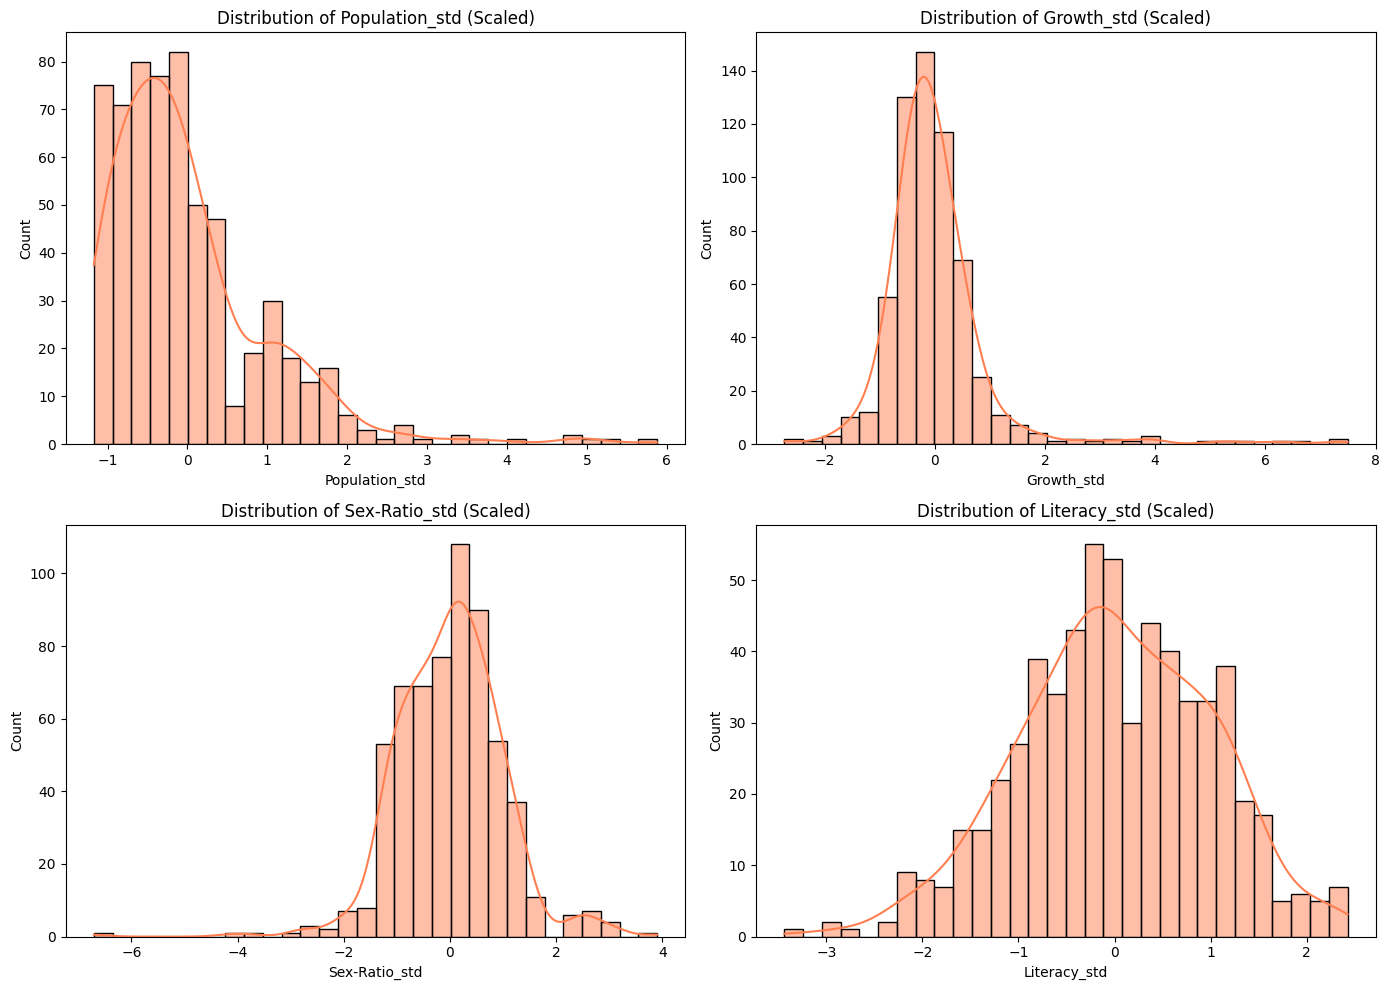

In [28]:
plt.figure(figsize=(14, 10))
for i, feature in enumerate(scaled_features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[feature], bins=30, kde=True, color='coral')
    plt.title(f'Distribution of {feature} (Scaled)')
plt.tight_layout()
plt.show()


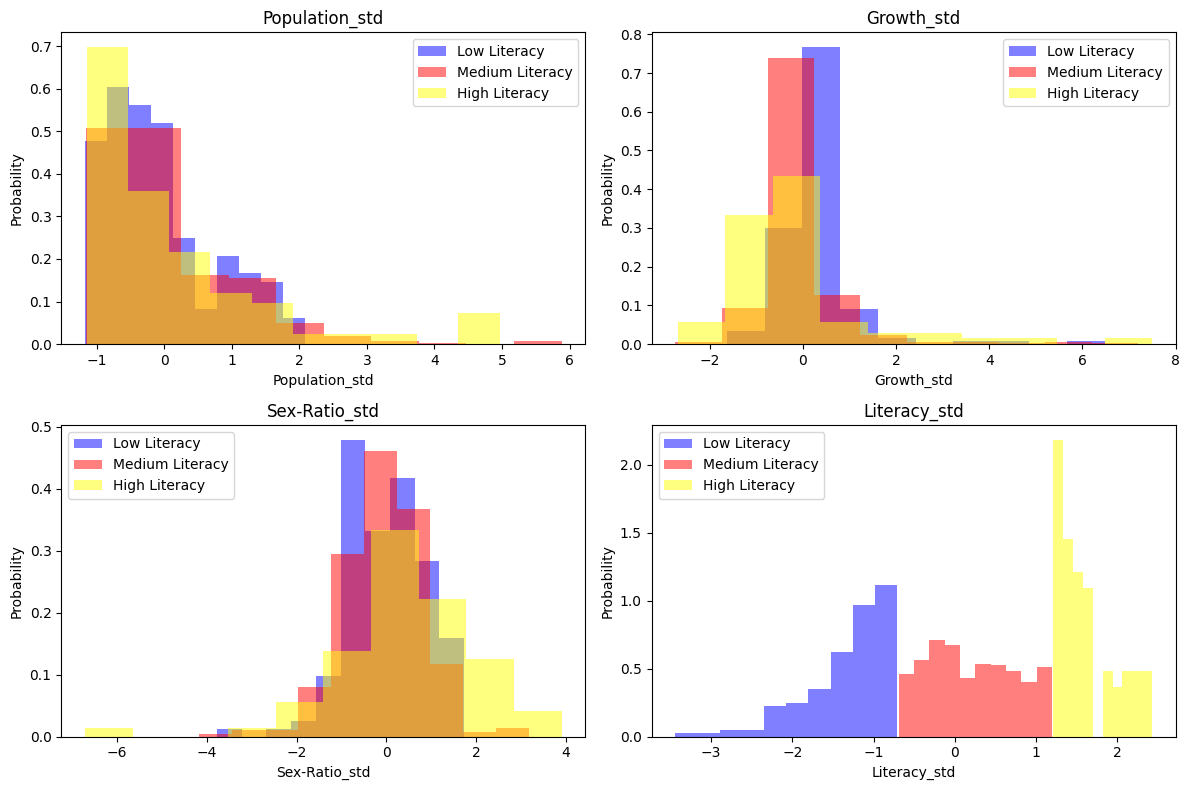

In [29]:
# create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# flatten axes for easy iteration
axes = axes.flatten()

for i, labels in enumerate(scaled_features):
    ax = axes[i]
    ax.hist(df[df["Target_encoded"]==0][labels], color='blue', label="Low Literacy", alpha=0.5, density=True)
    ax.hist(df[df["Target_encoded"]==1][labels], color='red', label="Medium Literacy", alpha=0.5, density=True)
    ax.hist(df[df["Target_encoded"]==2][labels], color='yellow', label="High Literacy", alpha=0.5, density=True)

    ax.set_title(labels)
    ax.set_ylabel("Probability")
    ax.set_xlabel(labels)
    ax.legend()

plt.tight_layout()
plt.show()


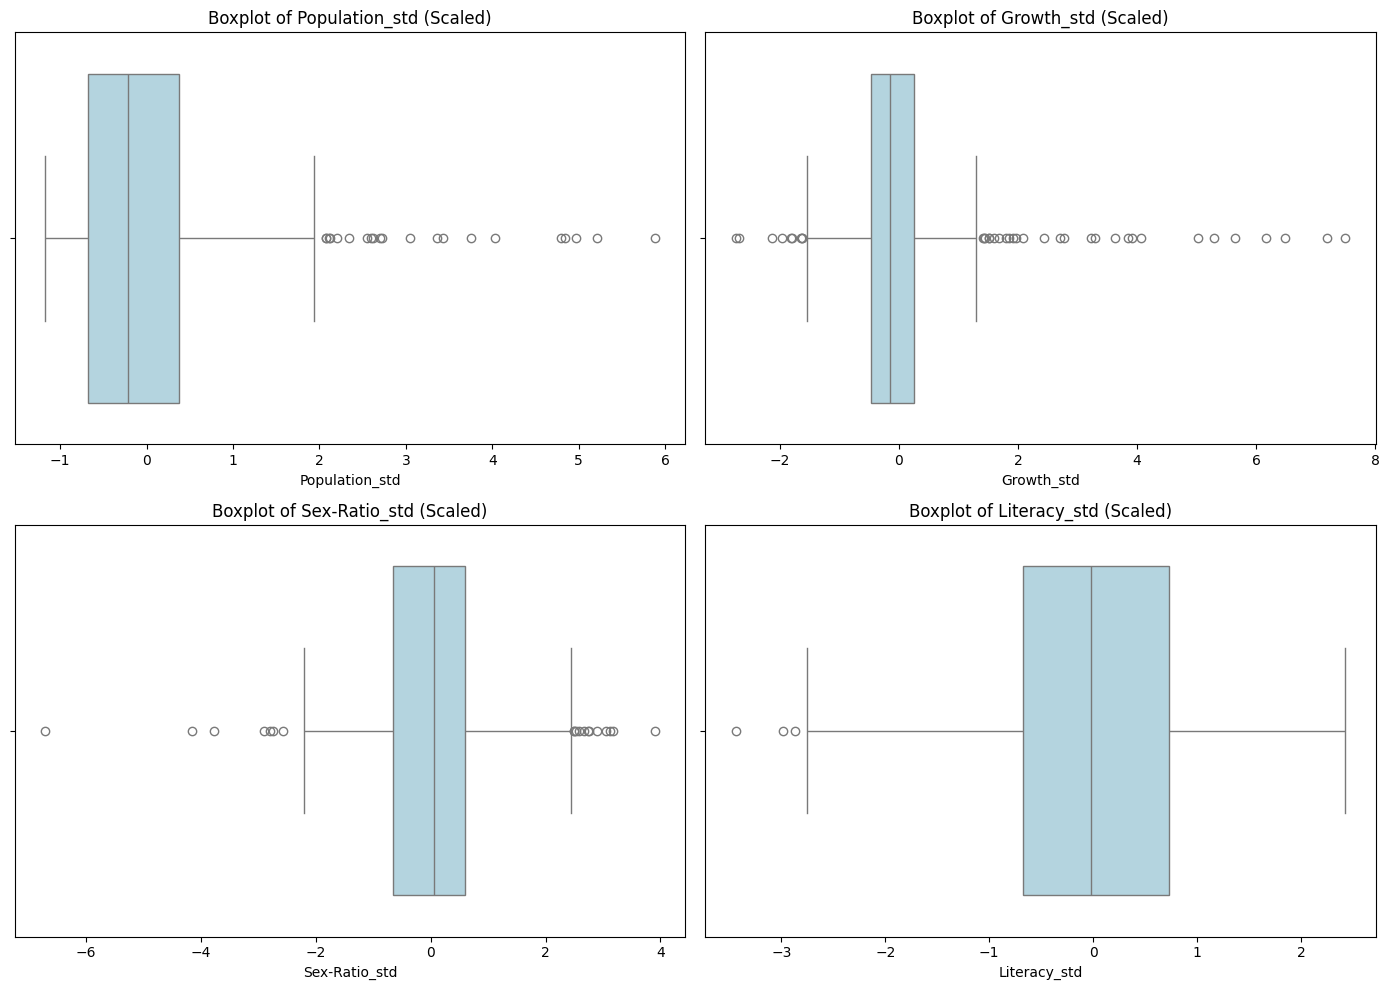

In [30]:
plt.figure(figsize=(14, 10))
for i, feature in enumerate(scaled_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[feature], color='lightblue')
    plt.title(f'Boxplot of {feature} (Scaled)')
plt.tight_layout()
plt.show()


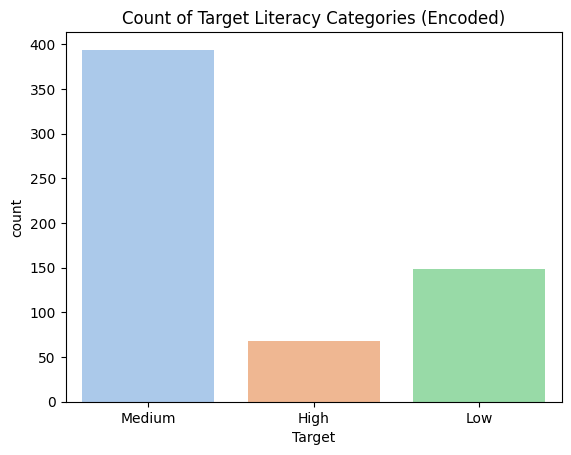

In [31]:
sns.countplot(x='Target', hue='Target', data=df, palette='pastel', legend=False)
plt.title('Count of Target Literacy Categories (Encoded)')
plt.show()

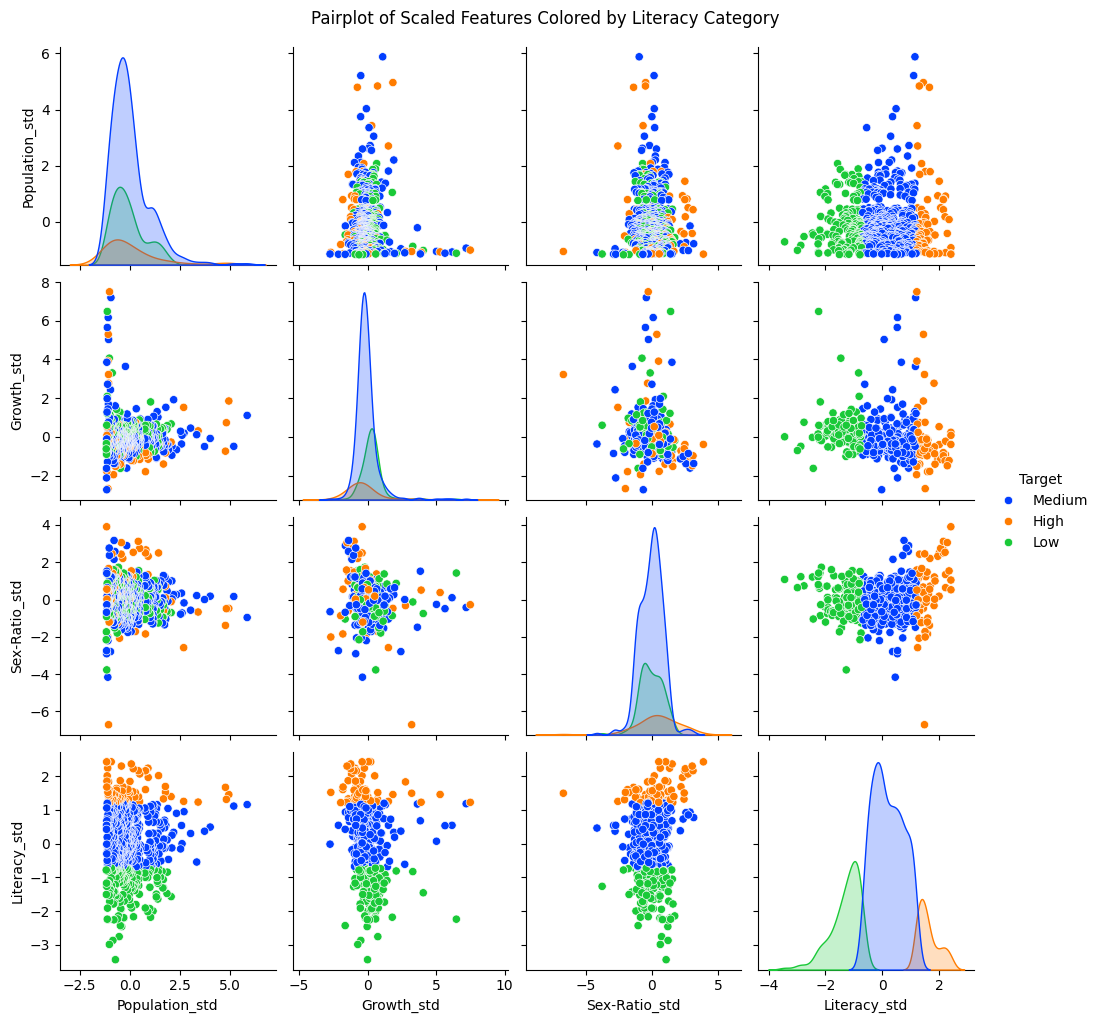

In [32]:
sns.pairplot(df, vars=['Population_std', 'Growth_std', 'Sex-Ratio_std', 'Literacy_std'], hue='Target', diag_kind='kde', palette='bright')
plt.suptitle('Pairplot of Scaled Features Colored by Literacy Category', y=1.02)
plt.show()

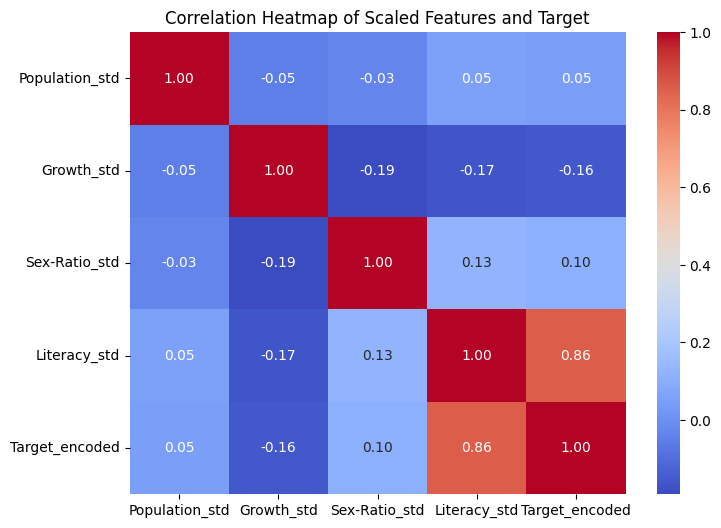

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[scaled_features + ['Target_encoded']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Scaled Features and Target')
plt.show()

## Splitting of data

In [34]:
df_shuffled = df.sample(frac=1, random_state=40).reset_index(drop=True)

train = df_shuffled.iloc[:int(0.7 * len(df))]
valid = df_shuffled.iloc[int(0.7 * len(df)):int(0.85 * len(df))]
test  = df_shuffled.iloc[int(0.85 * len(df)):]

### Training Data

In [35]:
train

,Ranking,District,Population,Growth,Sex-Ratio,Literacy,Target,Target_encoded,State_Andaman and Nicobar Islands,State_Andhra Pradesh,...,State_Sikkim,State_Tamil Nadu,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal,Population_std,Growth_std,Sex-Ratio_std,Literacy_std
0,97,Rae Bareli,3405559,18.56,943,67.25,Medium,1,0,0,...,0,0,0,1,0,0,0.995996,-0.058672,-0.031262,-0.483294
1,312,Kaushambi,1599596,23.70,908,61.28,Low,0,0,0,...,0,0,0,1,0,0,-0.156638,0.284084,-0.602713,-1.049660
2,230,Firozpur,2029074,16.21,893,68.92,Medium,1,0,0,...,0,0,0,0,0,0,0.117471,-0.215380,-0.847620,-0.324863
3,233,Ujjain,1986864,16.12,955,72.34,Medium,1,0,0,...,0,0,0,0,0,0,0.090531,-0.221382,0.164663,-0.000412
4,379,Katni,1292042,21.41,952,71.98,Medium,1,0,0,...,0,0,0,0,0,0,-0.352931,0.131378,0.115682,-0.034565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,64,Pashchim Champaran,3935042,29.29,909,55.70,Low,0,0,0,...,0,0,0,0,0,0,1.333932,0.656849,-0.586385,-1.579028
423,441,Chamarajanagar,1020791,5.73,993,61.43,Low,0,0,0,...,0,0,0,0,0,0,-0.526053,-0.914230,0.785095,-1.035430
424,158,Barmer,2603751,32.52,902,56.53,Low,0,0,0,...,0,0,0,0,0,0,0.484252,0.872239,-0.700675,-1.500287
425,437,Sirohi,1036346,21.76,940,55.25,Low,0,0,0,...,0,0,0,0,0,0,-0.516125,0.154717,-0.080244,-1.621719


### Validation Data

In [36]:
valid

,Ranking,District,Population,Growth,Sex-Ratio,Literacy,Target,Target_encoded,State_Andaman and Nicobar Islands,State_Andhra Pradesh,...,State_Sikkim,State_Tamil Nadu,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal,Population_std,Growth_std,Sex-Ratio_std,Literacy_std
427,222,Bokaro,2062330,16.01,922,72.01,Medium,1,0,0,...,0,0,0,0,0,0,0.138696,-0.228717,-0.374133,-0.031719
428,530,Central Delhi,582320,-9.91,892,85.14,High,2,0,0,...,0,0,0,0,0,0,-0.805902,-1.957170,-0.863947,1.213908
429,584,South Andaman,238142,14.23,871,89.13,High,2,1,0,...,0,0,0,0,0,0,-1.025569,-0.347415,-1.206817,1.592434
430,533,Gajapati,577817,11.37,1043,53.49,Low,0,0,0,...,0,0,0,0,0,0,-0.808776,-0.538131,1.601452,-1.788688
431,612,West Siang,112274,8.04,930,66.46,Medium,1,0,0,...,0,0,0,0,0,0,-1.105903,-0.760190,-0.243515,-0.558240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,534,Harda,570465,20.25,935,72.50,Medium,1,0,0,...,0,0,0,0,0,0,-0.813468,0.054024,-0.161880,0.014767
514,353,Bathinda,1388525,17.34,868,68.28,Medium,1,0,0,...,0,0,0,0,0,0,-0.291351,-0.140027,-1.255798,-0.385579
515,606,Tamenglong,140651,26.15,943,70.05,Medium,1,0,0,...,0,0,0,0,0,0,-1.087792,0.447461,-0.031262,-0.217662
516,165,Nizamabad,2551335,8.77,1040,61.25,Low,0,0,1,...,0,0,0,0,0,0,0.450798,-0.711510,1.552471,-1.052506


### Test Data

In [37]:
test

,Ranking,District,Population,Growth,Sex-Ratio,Literacy,Target,Target_encoded,State_Andaman and Nicobar Islands,State_Andhra Pradesh,...,State_Sikkim,State_Tamil Nadu,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal,Population_std,Growth_std,Sex-Ratio_std,Literacy_std
518,418,Jorhat,1092256,9.31,962,82.15,Medium,1,0,0,...,0,0,0,0,0,0,-0.480442,-0.675501,0.278953,0.930250
519,382,Damoh,1264219,16.63,910,69.73,Medium,1,0,0,...,0,0,0,0,0,0,-0.370688,-0.187373,-0.570058,-0.248020
520,262,Akola,1813906,11.27,946,88.05,High,2,0,0,...,0,0,0,0,0,0,-0.019857,-0.544800,0.017719,1.489976
521,594,Papumpare,176573,44.73,980,79.95,Medium,1,0,0,...,0,0,0,0,0,0,-1.064865,1.686452,0.572842,0.721539
522,436,Sambalpur,1041099,11.27,976,76.22,Medium,1,0,0,...,0,0,0,0,0,0,-0.513092,-0.544800,0.507533,0.367679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,471,Kupwara,870354,33.82,835,64.51,Low,0,0,0,...,0,0,0,0,0,0,-0.622068,0.958928,-1.794594,-0.743234
606,196,Kheda,2299885,13.62,940,82.65,Medium,1,0,0,...,0,0,0,0,0,0,0.290313,-0.388092,-0.080244,0.977684
607,8,Ahmadabad,7214225,24.03,904,85.31,High,2,0,0,...,0,0,0,0,0,0,3.426830,0.306090,-0.668021,1.230035
608,250,Farrukhabad,1885204,20.05,874,69.04,Medium,1,0,0,...,0,0,0,1,0,0,0.025648,0.040687,-1.157835,-0.313479



# KNN Classifier

## Eucledian Distance Function

In [38]:
def eucledian_dist(x_train,x_test):
    return np.sqrt(np.sum((x_train-x_test)**2))

In [39]:
features=["Population_std","Growth_std","Sex-Ratio_std"] + state_cols
x_train=train[features].values
print(x_train)    

y_train=train["Target_encoded"].values
print(y_train)

[[ 0.9959957  -0.05867223 -0.03126247 ...  1.          0.
   0.        ]
 [-0.156638    0.28408439 -0.60271255 ...  1.          0.
   0.        ]
 [ 0.11747106 -0.21538002 -0.84761973 ...  0.          0.
   0.        ]
 ...
 [ 0.48425159  0.87223873 -0.70067542 ...  0.          0.
   0.        ]
 [-0.51612539  0.1547171  -0.0802439  ...  0.          0.
   0.        ]
 [-0.97402777 -0.16203268 -0.96190974 ...  0.          0.
   0.        ]]
[1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 2 2 1 1 1 0 1 0 1 1 1 1 1
 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 2 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0
 2 1 0 0 1 1 1 1 2 1 0 1 1 0 1 2 1 1 1 1 2 1 1 1 1 0 2 1 0 2 0 1 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 0 0 1 1 1 1 1 2 2 1 1 0 1 1 0 2 1 1 1 1 1 1 1 0 2
 1 1 0 1 1 1 1 1 1 0 2 1 1 0 0 1 1 1 1 0 1 2 1 1 1 1 1 2 1 1 1 1 2 1 1 2 1
 0 1 2 0 1 1 1 0 1 1 2 2 1 1 0 2 1 0 0 1 2 2 1 1 1 1 1 0 1 1 1 1 1 1 2 2 1
 1 2 0 0 2 2 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

In [40]:
x_valid=valid[features].values
y_valid=valid["Target_encoded"].values

In [41]:
x_test=test[features].values
y_test=test["Target_encoded"].values

In [42]:
print(eucledian_dist(x_train[0],x_valid[0]))
print(eucledian_dist(x_train[1],x_valid[0]))

1.6974796970766324
1.549979446213431


## Distance Matrix Creation

In [43]:
def distance_matrix(x_train,x_valid):
    l1=[]
    for i in range(0,len(x_valid)):
        l2=[]
        for j in range(0,len(x_train)):
            l2.append(eucledian_dist(x_train[j],x_valid[i]))
        l1.append(l2)  
    dist=np.array(l1)
    return dist    

In [44]:
dist=distance_matrix(x_train,x_valid)
print(dist)     

[[1.6974797  1.54997945 1.49158256 ... 1.85422273 1.63161992 1.89422377]
 [3.08941641 2.74098708 2.42625598 ... 3.4200453  2.67548683 2.29355239]
 [2.74809488 1.87583974 1.85822416 ... 2.45423975 1.94443724 1.44810308]
 ...
 [2.56872351 1.79451783 2.13505392 ... 2.25828926 1.55399496 1.80292225]
 [2.28727977 2.82931109 2.84915522 ... 3.09613419 2.52012833 3.26407136]
 [1.60049119 1.80822184 1.8665602  ... 1.53369144 2.07623216 2.53594955]]


## Finding k nearest neighbours and predicting the label

In [45]:
def knn_predict(dist,y_train,k=3):
    y_predict=[]

    for i in dist:
        kn_indices=np.argsort(i)[:k]
        kn_labels=y_train[kn_indices]

        labels,counts=np.unique(kn_labels,return_counts=True)
        prediction=labels[np.argmax(counts)]
        y_predict.append(prediction)
    y_predict=np.array(y_predict) 

    return y_predict

### knn=3

In [46]:
y_predict1=knn_predict(dist,y_train,3)
print(y_predict1)
print(y_valid)

[1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 2 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1
 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 0 1 0 1 1 0 1 0 2 0 1 1 1 0 1 1 1 0 0 0 1 1
 1 1 0 1 1 0 1 1 1 1 1 2 1 1 1 0 0]
[1 2 2 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 2 1
 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 2 2 0 1 1 1 1 2 2 1 1 1 1 1 1 1 0 0 0 1 1
 1 1 1 0 1 0 1 1 0 1 1 2 1 1 1 0 0]


### knn=5

In [47]:
y_predict2=knn_predict(dist,y_train,5)
print(y_predict2)
print(y_valid)

[0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1
 1 1 1 1 2 1 1 2 1 1 1 2 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1
 1 1 0 1 1 0 1 1 1 1 0 2 1 1 1 0 0]
[1 2 2 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 2 1
 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 2 2 0 1 1 1 1 2 2 1 1 1 1 1 1 1 0 0 0 1 1
 1 1 1 0 1 0 1 1 0 1 1 2 1 1 1 0 0]


### knn=7

In [48]:
y_predict3=knn_predict(dist,y_train,7)
print(y_predict3)
print(y_valid)

[0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1
 1 1 1 1 2 1 1 2 1 1 1 2 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0]
[1 2 2 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 2 1
 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 2 2 0 1 1 1 1 2 2 1 1 1 1 1 1 1 0 0 0 1 1
 1 1 1 0 1 0 1 1 0 1 1 2 1 1 1 0 0]


### Accuracy = True positives/Total prediction

In [49]:
def accuracy(y_predict,y_valid):
    correct_predictions=0
    total_predictions=len(y_valid)
    for i in range(0,total_predictions):
        if (y_predict[i]==y_valid[i]):
            correct_predictions+=1

    return correct_predictions/total_predictions*100    

In [50]:
print("Accuracy of the model with knn=3 is ",accuracy(y_predict1,y_valid),"%")
print("Accuracy of the model with knn=5 is ",accuracy(y_predict2,y_valid),"%")
print("Accuracy of the model with knn=7 is ",accuracy(y_predict3,y_valid),"%")

Accuracy of the model with knn=3 is  79.12087912087912 %
Accuracy of the model with knn=5 is  75.82417582417582 %
Accuracy of the model with knn=7 is  73.62637362637363 %


### Confusion Matrix

In [51]:
def confusion_matrix(y_predict,y_actual):
    matrix=np.zeros((3,3),dtype=int)
    for i in range(len(y_actual)):
        matrix[y_actual[i]][y_predict[i]]+=1
    return matrix    

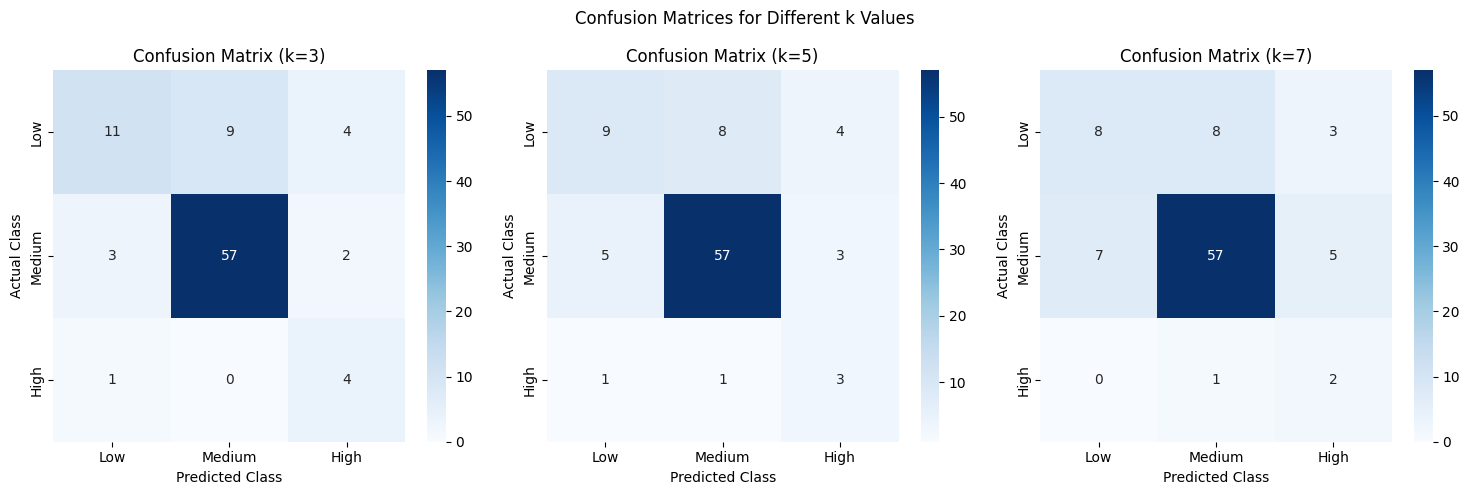

In [52]:
plt.figure(figsize=(15, 5))

# For k=3
plt.subplot(1, 3, 1)
conf_matrix_k3 = confusion_matrix(y_valid, y_predict1)
sns.heatmap(conf_matrix_k3, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix (k=3)')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

# For k=5
plt.subplot(1, 3, 2)
conf_matrix_k5 = confusion_matrix(y_valid, y_predict2)
sns.heatmap(conf_matrix_k5, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix (k=5)')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

# For k=7
plt.subplot(1, 3, 3)
conf_matrix_k7 = confusion_matrix(y_valid, y_predict3)
sns.heatmap(conf_matrix_k7, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix (k=7)')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

plt.suptitle('Confusion Matrices for Different k Values')
plt.tight_layout()
plt.show()

### Class Distribution Plots

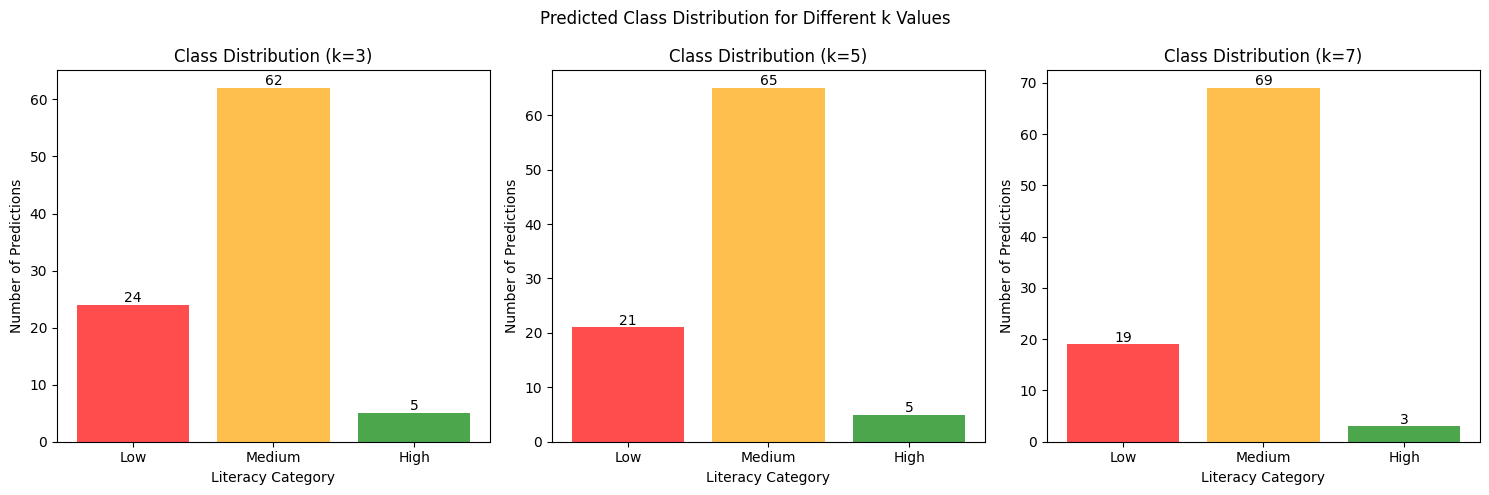

In [53]:
plt.figure(figsize=(15, 5))

# For k=3
plt.subplot(1, 3, 1)
low_count_k3 = list(y_predict1).count(0)
medium_count_k3 = list(y_predict1).count(1) 
high_count_k3 = list(y_predict1).count(2)

classes = ['Low', 'Medium', 'High']
counts_k3 = [low_count_k3, medium_count_k3, high_count_k3]

plt.bar(classes, counts_k3, color=['red', 'orange', 'green'],alpha=0.7)
plt.title('Class Distribution (k=3)')
plt.ylabel('Number of Predictions')
plt.xlabel('Literacy Category')

for j, count in enumerate(counts_k3):
    plt.text(j, count + 0.5, str(count), ha='center')

# For k=5
plt.subplot(1, 3, 2)
low_count_k5 = list(y_predict2).count(0)
medium_count_k5 = list(y_predict2).count(1) 
high_count_k5 = list(y_predict2).count(2)

counts_k5 = [low_count_k5, medium_count_k5, high_count_k5]

plt.bar(classes, counts_k5, color=['red', 'orange', 'green'],alpha=0.7)
plt.title('Class Distribution (k=5)')
plt.ylabel('Number of Predictions')
plt.xlabel('Literacy Category')

for j, count in enumerate(counts_k5):
    plt.text(j, count + 0.5, str(count), ha='center')

# For k=7
plt.subplot(1, 3, 3)
low_count_k7 = list(y_predict3).count(0)
medium_count_k7 = list(y_predict3).count(1) 
high_count_k7 = list(y_predict3).count(2)

counts_k7 = [low_count_k7, medium_count_k7, high_count_k7]

plt.bar(classes, counts_k7, color=['red', 'orange', 'green'],alpha=0.7)
plt.title('Class Distribution (k=7)')
plt.ylabel('Number of Predictions')
plt.xlabel('Literacy Category')

for j, count in enumerate(counts_k7):
    plt.text(j, count + 0.5, str(count), ha='center')

plt.suptitle('Predicted Class Distribution for Different k Values')
plt.tight_layout()
plt.show()


# K-Fold Cross Validation

In [54]:
def kfold_split(x_data,y_data,k_folds=5):
    n=len(y_data)
    np.seed=(0)
    indices=np.arange(n)
    #np.random.shuffle(indices)
    x_shuffled=x_data[indices]
    y_shuffled=y_data[indices]
    folds_x = np.array_split(x_shuffled, k_folds)
    folds_y = np.array_split(y_shuffled, k_folds)
    
    return folds_x, folds_y   

In [55]:
k_folds=5
x_folds,y_folds=kfold_split(x_train,y_train,k_folds)

In [56]:
def knn_cross_validation(x_fold,y_fold,k_folds,knn_k):
    fold_accuracies = []

    # Looping through each fold
    for i in range(k_folds):
        print(f"Testing Fold",i+1)
    
        # Current fold becomes validation
        x_val_fold = x_folds[i]
        y_val_fold = y_folds[i]
    
        # Combine other folds for training
        x_train_fold = []
        y_train_fold = []
    
        for j in range(k_folds):
            if j != i:  # Skip validation fold
                x_train_fold.extend(x_folds[j])
                y_train_fold.extend(y_folds[j])
    
        # Converting them to numpy arrays
        x_train_fold = np.array(x_train_fold)
        y_train_fold = np.array(y_train_fold)
    
        # KNN prediction
        dist=distance_matrix(x_train_fold,x_val_fold)
        predictions = knn_predict(dist,y_train_fold,knn_k)
        print("Predictions are:",predictions)

        #Accuracy Calculation
        acc=accuracy(predictions,y_val_fold)
        fold_accuracies.append(acc)
        print("Accuracy of fold",i+1,"is",acc)
        print()

    #Mean accuracy Calculation
    mean = np.mean(fold_accuracies)
    std = np.std(fold_accuracies)
    print(f"knn={knn_k} Mean: {mean:.2f}% ± {std:.2f}%")     

    return mean,std    

### Testing with knn=3

In [57]:
mean3,std3=knn_cross_validation(x_folds,y_folds,k_folds,3)

Testing Fold 1
Predictions are: [1 0 1 1 0 2 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 2 2 1 1 1 0 1 0 1 1 1 1 1
 0 1 0 0 1 1 1 1 1 1 1 1 2 1 1 1 0 1 0 1 1 2 1 1 1 2 1 1 1 1 0 1 0 1 1 1 0
 2 1 1 0 1 1 1 1 1 1 1 1]
Accuracy of fold 1 is 77.90697674418605

Testing Fold 2
Predictions are: [1 0 1 1 1 1 1 1 1 1 1 1 2 1 2 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 2 1
 1 0 0 0 0 1 1 0 1 1 1 0]
Accuracy of fold 2 is 72.09302325581395

Testing Fold 3
Predictions are: [1 1 1 1 1 1 1 0 2 1 1 0 1 0 1 1 0 1 1 1 0 1 1 2 1 1 1 1 1 1 1 0 1 1 2 1 1
 1 1 1 1 1 1 0 1 1 1 1 2 1 1 1 0 0 1 2 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 0 1 1]
Accuracy of fold 3 is 72.94117647058823

Testing Fold 4
Predictions are: [1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 2 0 1 1 1 0 0 1 1 1 0 1 1
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 2 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 1 0 1 1 1 1 0 1]
Accuracy of fold 4 is 76.47058823529412

Testing 

### Testing with knn=5

In [58]:
mean5,std5=knn_cross_validation(x_folds,y_folds,k_folds,5)

Testing Fold 1
Predictions are: [1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 2 1 1 0 2 1 1 1 1 0 1 1 1 1 1 0
 1 1 0 0 1 1 1 1 1 1 1 1]
Accuracy of fold 1 is 75.5813953488372

Testing Fold 2
Predictions are: [1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 1 1 0 1 1 1 1]
Accuracy of fold 2 is 70.93023255813954

Testing Fold 3
Predictions are: [1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 2 1 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 2 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 0 1 1]
Accuracy of fold 3 is 64.70588235294117

Testing Fold 4
Predictions are: [1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1
 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 2 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 1 1 0 1 1 1 1 1 1]
Accuracy of fold 4 is 78.82352941176471

Testing F

### Testing with knn=7

In [59]:
mean7,std7=knn_cross_validation(x_folds,y_folds,k_folds,7)

Testing Fold 1
Predictions are: [1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 2 1 1 1 2 1 1 1 2 0 1 1 1 1 1 0
 1 1 0 0 1 1 0 1 1 1 1 1]
Accuracy of fold 1 is 75.5813953488372

Testing Fold 2
Predictions are: [1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1
 1 0 0 0 0 1 1 0 1 1 1 1]
Accuracy of fold 2 is 70.93023255813954

Testing Fold 3
Predictions are: [1 1 1 1 0 1 1 1 1 1 1 2 1 0 1 1 0 1 1 1 0 1 0 2 1 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 2 0 1 1 1 1 1 1 1 1 0 0 1 2 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 0 1 1]
Accuracy of fold 3 is 64.70588235294117

Testing Fold 4
Predictions are: [1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1
 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 1 1 0 1 1 1 1 1 1]
Accuracy of fold 4 is 76.47058823529412

Testing F

## K Fold Cross Validation Results

In [60]:
k=[3,5,7]
mean=[mean3,mean5,mean7]
best_k_index=np.argmax(mean)
best_k=k[best_k_index]
print("Best mean accuracy is with k =",best_k)

std=[std3,std5,std7]
stable_k_index=np.argmin(std)
stable_k=k[stable_k_index]
print("Best stability is with k =",stable_k)

print("So, k =",best_k,"is selected for final testing")


Best mean accuracy is with k = 3
Best stability is with k = 7
So, k = 3 is selected for final testing


## K Fold Cross Validation Results Visualisation

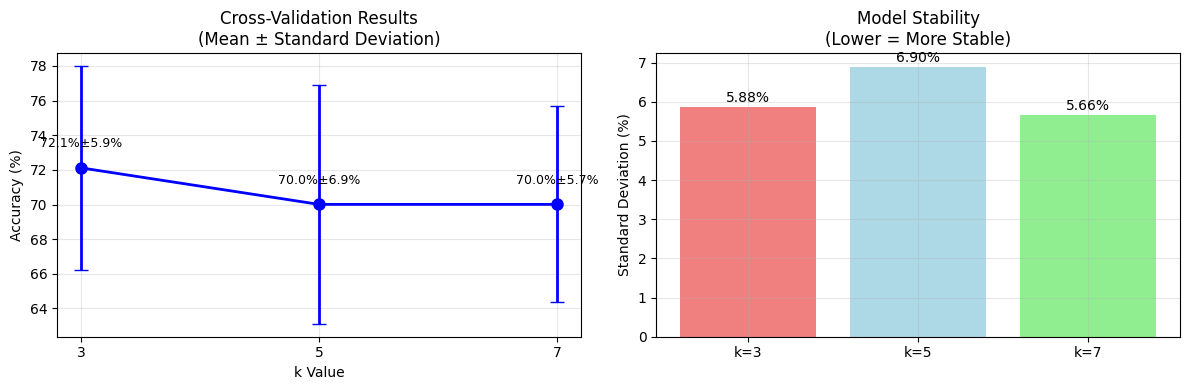

In [61]:
k_values = [3, 5, 7]
means = [mean3, mean5, mean7]
stds = [std3, std5, std7]

plt.figure(figsize=(12, 4))

# Plot 1: Mean accuracy 
plt.subplot(1, 2, 1)
plt.errorbar(k_values, means, yerr=stds, marker='o', linewidth=2, 
             markersize=8, capsize=5, color='blue')
plt.xlabel('k Value')
plt.ylabel('Accuracy (%)')
plt.title('Cross-Validation Results\n(Mean ± Standard Deviation)')
plt.grid(True, alpha=0.3)
plt.xticks(k_values)

# Add text annotations
for i, (k, mean, std) in enumerate(zip(k_values, means, stds)):
    plt.annotate(f'{mean:.1f}%±{std:.1f}%', 
                 (k, mean), textcoords="offset points", 
                 xytext=(0,15), ha='center', fontsize=9)

# Plot 2: Stability comparison (standard deviation)
plt.subplot(1, 2, 2)
bars = plt.bar([f'k={k}' for k in k_values], stds, 
               color=['lightcoral', 'lightblue', 'lightgreen'])
plt.ylabel('Standard Deviation (%)')
plt.title('Model Stability\n(Lower = More Stable)')
plt.grid(True, alpha=0.3)

for bar, std in zip(bars, stds):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
             f'{std:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# Final Evaluation

#### Model with higher mean accuracy is selected


## Testing with best_k

In [62]:
dist_test=distance_matrix(x_train,x_test)
y_pred_test=knn_predict(dist_test,y_train,best_k)

## Accuracy

In [63]:
acc_test=accuracy(y_pred_test,y_test)
print(acc_test)

69.56521739130434


## Confusion Matrix

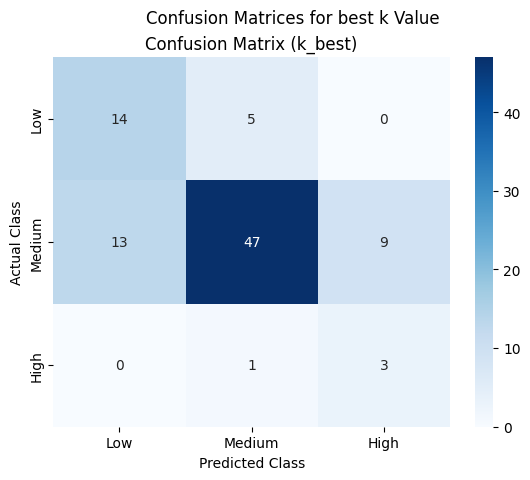

In [64]:
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix (k_best)')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

plt.suptitle('Confusion Matrices for best k Value')

plt.show()

## True Labels and Predicted Labels Distribution

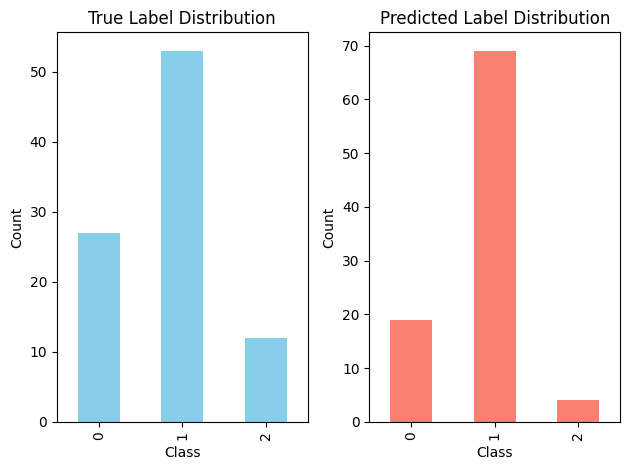

In [65]:
# True labels distribution
plt.subplot(1,2,1)
pd.Series(y_test).value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('True Label Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

# Predicted labels distribution
plt.subplot(1,2,2)
pd.Series(y_pred_test).value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title('Predicted Label Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


## Precision, Recall, F1 Score, Metrics

In [66]:
def precision_recall_f1(y_true, y_pred, classes):
    metrics = {'precision': [], 'recall': [], 'f1': []}
    for cls in classes:
        tp = np.sum((y_pred == cls) & (y_true == cls))
        fp = np.sum((y_pred == cls) & (y_true != cls))
        fn = np.sum((y_pred != cls) & (y_true == cls))

        if (tp + fp) > 0:
            precision = tp / (tp + fp)
        else:
            precision = 0

        if (tp + fn) > 0:
            recall = tp / (tp + fn)
        else:
            recall = 0

        if (precision + recall) > 0:
            f1 = (2 * precision * recall) / (precision + recall)
        else:
            f1 = 0

        metrics['precision'].append(precision)
        metrics['recall'].append(recall)
        metrics['f1'].append(f1)

    return metrics

        precision    recall        f1
Low      0.736842  0.518519  0.608696
Medium   0.681159  0.886792  0.770492
High     0.750000  0.250000  0.375000


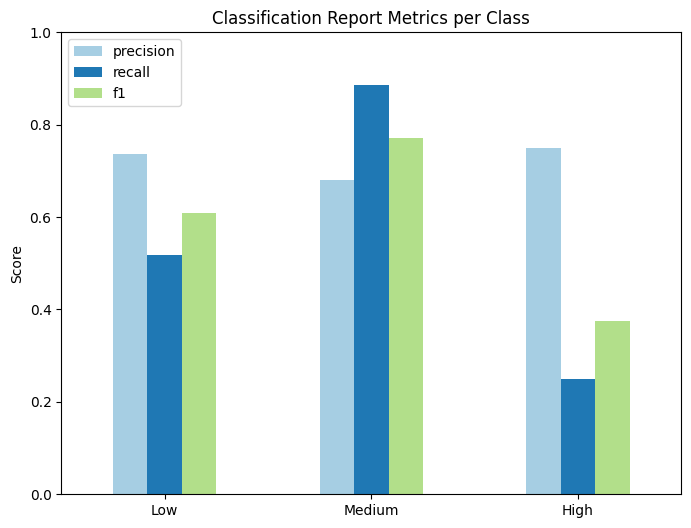

In [67]:
classes = [0,1,2]  # Correspond to Low, Medium, High literacy
metrics = precision_recall_f1(y_test, y_pred_test, classes)
labels = ['Low', 'Medium', 'High']
df_metrics = pd.DataFrame(metrics, index=labels)
print(df_metrics)
df_metrics.plot(kind='bar', figsize=(8,6),color=plt.cm.Paired.colors)
plt.ylim(0, 1)
plt.title('Classification Report Metrics per Class')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.show()
